In [1]:
import numpy as np
import matplotlib.pyplot as pl

Code adapted from [https://allofyourbases.com/2017/08/21/gaussian-processes-in-python/](https://allofyourbases.com/2017/08/21/gaussian-processes-in-python/)

In [2]:
def cov_kernel(x1,x2,h,lam):
 
    """
    Squared-Exponential covariance kernel
    """
 
    k12 = h**2*np.exp(-1.*(x1 - x2)**2/lam**2)
    return k12

- On the diagonal K = h^2
- Lambda functions like a std. dev.

In [3]:
def make_K(x, h, lam):
 
    """
    Make covariance matrix from covariance kernel
    """
 
    # for a data array of length x, make a covariance matrix x*x:
    K = np.zeros((len(x),len(x)))
 
    for i in range(0,len(x)):
        for j in range(0,len(x)):
 
            # calculate value of K for each separation:
            K[i,j] = cov_kernel(x[i],x[j],h,lam)
    
    return K

<ipython-input-4-f81e8870ab6c>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pl.subplot(int(tmp2))
<ipython-input-4-f81e8870ab6c>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pl.subplot(int(tmp2))
<ipython-input-4-f81e8870ab6c>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and

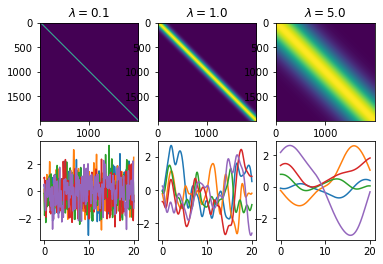

In [4]:
# make an array of 200 evenly spaced positions between 0 and 20:
x = np.arange(0, 20.,0.01)
 
for i in range(0,3):
 
    h = 1.0
 
    if (i==0): lam = 0.1
    if (i==1): lam = 1.0
    if (i==2): lam = 5.0
 
    # make a covariance matrix:
    K = make_K(x,h,lam)
 
    # five realisations:
    for j in range(0,5):
 
        # draw samples from a co-variate Gaussian distribution, N(0,K):
        y = np.random.multivariate_normal(np.zeros(len(x)),K)
 
        tmp2 = '23'+str(i+3+1)
        pl.subplot(int(tmp2))
        pl.plot(x,y)
 
    tmp1 = '23'+str(i+1)
    pl.subplot(int(tmp1))
    pl.imshow(K)
    pl.title(r"$\lambda = $"+str(lam))

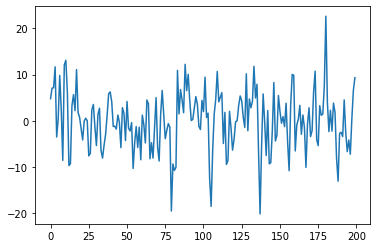

In [32]:
# make an array of 200 evenly spaced positions between 0 and 20:
x = np.arange(0, 200, 1)
  
h = 6.645
lam = 1

# make a covariance matrix:
K = make_K(x,h,lam)

# five realisations:
for j in range(0,1):

    # draw samples from a co-variate Gaussian distribution, N(0,K):
    y = np.random.multivariate_normal(np.zeros(len(x)),K)

    pl.plot(x,y)

(array([ 7., 10., 15., 34., 47., 39., 26., 16.,  3.,  2.]),
 array([-18.47339971, -14.53284723, -10.59229475,  -6.65174227,
         -2.71118979,   1.22936269,   5.16991517,   9.11046764,
         13.05102012,  16.9915726 ,  20.93212508]),
 <BarContainer object of 10 artists>)

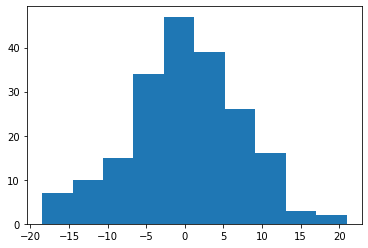

In [33]:
pl.hist(np.diff(y))